## Algorithm training, testing, validation, and experiment tracking

In [1]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set() # Revert to matplotlib defaults
plt.rcParams['figure.figsize'] = (16, 12)
import warnings
warnings.filterwarnings("ignore")

### Model training and testing

In [2]:
# import libraries for algorithms traininng, and metrics to judge performance
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import StratifiedKFold, RepeatedKFold, KFold
from sklearn.model_selection import cross_val_score
from yellowbrick.regressor import ResidualsPlot

In [3]:
# training data
train_df = pd.read_csv('~/Desktop/working/HW-3-Solar-Enery-Project/datasets/cleaned/train.csv')
X_train = train_df.drop(['Daily_radiation'], axis = 1)
y_train = train_df['Daily_radiation']

# test data
test_df = pd.read_csv('~/Desktop/working/HW-3-Solar-Enery-Project/datasets/cleaned/test.csv')
X_test = test_df.drop(['Daily_radiation'], axis = 1)
y_test = test_df['Daily_radiation']

### Linear Regression

In [4]:
# Setup the pipeline steps for linear regression
steps = [('scaler', StandardScaler()), ('lr', LinearRegression())]
# Create the pipeline
pipeline_lr = Pipeline(steps)
# Fit the pipeline to the train set
pipeline_lr.fit(X_train, y_train)
# Predict the labels of the test set
y_pred_lr = pipeline_lr.predict(X_test)

In [5]:
#Evaluating algorithm performance
mse = mean_squared_error(y_test, y_pred_lr, squared = False)

mae = mean_absolute_error(y_test, y_pred_lr)

print('r2_score', r2_score(y_test, y_pred_lr))

print('Root Mean Squared Error: %.2f' % np.sqrt(mse))

print('Root Mean Absolute Error: %.2f' % np.sqrt(mae))

r2_score 0.8879723669160815
Root Mean Squared Error: 6.53
Root Mean Absolute Error: 5.85


### Random Forest Regressor

In [6]:
# Setup the pipeline steps for random forest: steps
steps = [('scaler', StandardScaler()), ('rfr', RandomForestRegressor())]
# Create the pipeline: pipeline
pipeline_rfr = Pipeline(steps)
# Fit the pipeline to the train set
pipeline_rfr.fit(X_train, y_train)
# Predict the labels of the test set
y_pred_rfr = pipeline_rfr.predict(X_test)

In [7]:
# Evaluating algorithm performance
mse_rf = mean_squared_error(y_test, y_pred_rfr, squared=False)

mae_rf = mean_absolute_error(y_test, y_pred_rfr)

print('r2_score', r2_score(y_test, y_pred_rfr))

print('Root Mean Squared Error: %.2f' % np.sqrt(mse_rf))

print('Root Mean Absolute Error: %.2f' % np.sqrt(mae_rf))

r2_score 0.9804944054511663
Root Mean Squared Error: 4.22
Root Mean Absolute Error: 3.73


### GradientBoosting Regressor

In [8]:
# Setup the pipeline steps: steps
steps = [('scaler', StandardScaler()), ('gbr', GradientBoostingRegressor())]
# Create the pipeline: pipeline
pipeline_gbr = Pipeline(steps)
# Fit the pipeline to the train set
pipeline_gbr.fit(X_train, y_train)
# Predict the labels of the test set
y_pred_gbr = pipeline_gbr.predict(X_test)

In [9]:
# Evaluating algorithm performance
mse_gr = mean_squared_error(y_test, y_pred_gbr, squared = False)

mae_gr = mean_absolute_error(y_test, y_pred_gbr)

print('r2_score', r2_score(y_test, y_pred_gbr))

print('Root Mean Squared Error: %.2f' % np.sqrt(mse_gr))

print('Root Mean Absolute Error: %.2f' % np.sqrt(mae_gr))

r2_score 0.9772753121664325
Root Mean Squared Error: 4.38
Root Mean Absolute Error: 3.80


### Model Validation

In [10]:
# validation data
val_df = pd.read_csv('~/Desktop/working/HW-3-Solar-Enery-Project/datasets/cleaned/validation.csv')
X_val = val_df.drop(['Daily_radiation'], axis = 1)
y_val = val_df['Daily_radiation']

In [11]:
y_val_lr = pipeline_lr.predict(X_val)
y_val_rfr = pipeline_rfr.predict(X_val)
y_val_gbr = pipeline_gbr.predict(X_val)

In [12]:
# Evaluating algorithm performance for linear regression
mse_lr_val = mean_squared_error(y_val, y_val_lr, squared = False)

mae_lr_val = mean_absolute_error(y_val, y_val_lr)

print('r2_score', r2_score(y_val, y_val_lr))

print('Linear Regression - Root Mean Squared Error: %.2f' % np.sqrt(mse_lr_val))

print('Linear Regression - Root Mean Absolute Error: %.2f' % np.sqrt(mse_lr_val))

r2_score 0.8719793640959541
Linear Regression - Root Mean Squared Error: 6.74
Linear Regression - Root Mean Absolute Error: 6.74


In [13]:
# Evaluating algorithm performance for random forest regression
mse_rf_val = mean_squared_error(y_val, y_val_rfr, squared = False)

mae_rf_val = mean_absolute_error(y_val, y_val_rfr)

print('r2_score', r2_score(y_val, y_val_rfr))

print('Random Forest - Root Mean Squared Error: %.2f' % np.sqrt(mse_rf_val))

print('Random Forest - Root Mean Absolute Error: %.2f' % np.sqrt(mse_rf_val))

r2_score 0.9817144344254628
Random Forest - Root Mean Squared Error: 4.14
Random Forest - Root Mean Absolute Error: 4.14


In [14]:
# Evaluating algorithm performance for gradient boost regression
mse_gbr_val = mean_squared_error(y_val, y_val_gbr, squared = False)

mae_gbr_val = mean_absolute_error(y_val, y_val_gbr)

print('r2_score', r2_score(y_val, y_val_gbr))

print('Gradient Boost - Root Mean Squared Error: %.2f' % np.sqrt(mse_gbr_val))

print('Gradient Boost - Root Mean Absolute Error: %.2f' % np.sqrt(mae_gbr_val))

r2_score 0.9783439634707554
Gradient Boost - Root Mean Squared Error: 4.32
Gradient Boost - Root Mean Absolute Error: 3.84


In [15]:
# Create a pipeline to scale our data then fit our different models
pipelines = {
    'LR': make_pipeline(StandardScaler(), LinearRegression()),
    'RF': make_pipeline(StandardScaler(), RandomForestRegressor(random_state=1)),
    'GBR': make_pipeline(StandardScaler(), GradientBoostingRegressor(random_state=1)),
}


In [16]:
# The following code fits the model, and evoluate model performance
# through cross validation in order to see how models generalize
results = []
names = []
for name, model in pipelines.items():
    # Fit model on X_train, y_train
    model.fit(X_train.values, y_train)
    # Store model in fitted_models[name] for later use
    # Print '{name} has been fitted'
    print(name, 'has been fitted.')

    # Cross validation in order to see how the model generalizes across 10 foldS
    kfold = KFold(n_splits=20, random_state=1, shuffle=True)#
    cv_results = cross_val_score(model, X_train.values, y_train, cv=kfold, scoring='r2')
    results.append(cv_results)
    names.append(name)
    # Print average r2 and standard deviation of r2 based on 10 CV folds
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR has been fitted.
LR: 0.877289 (0.034878)
RF has been fitted.
RF: 0.974038 (0.008699)
GBR has been fitted.
GBR: 0.973259 (0.010246)


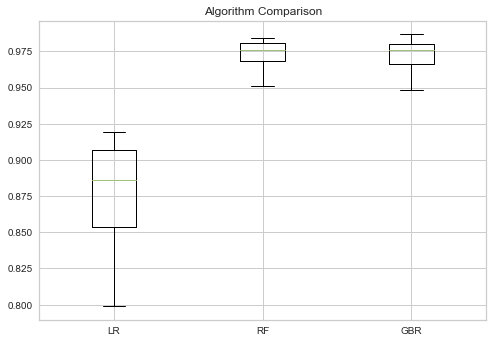

In [17]:
# Visualize performace of each model using boxplots
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

In [18]:
# Among our 3 models, Random Forest Regressor performs slightly better than Gradient Boosting Regressor terms of 
# average R2 score on the 20 folds. 

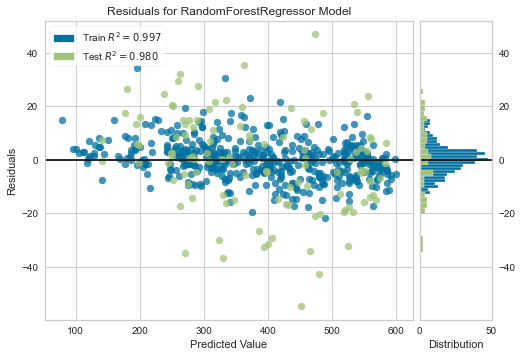

In [19]:

visualizer = ResidualsPlot(pipeline_rfr)

visualizer.fit(X_train.values, y_train)  
visualizer.score(X_test.values, y_test)  
visualizer.show();  

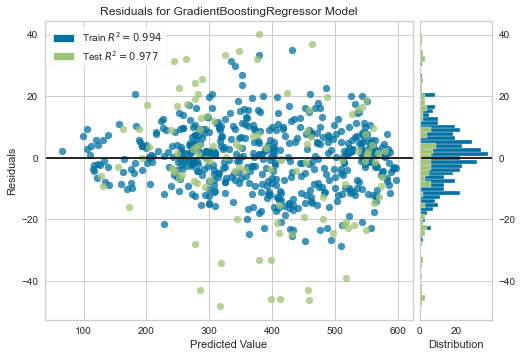

In [20]:
visualizer = ResidualsPlot(pipeline_gbr)

visualizer.fit(X_train.values, y_train)  
visualizer.score(X_test.values, y_test)  
visualizer.show();  

In [21]:
## Export model and hook it with api

## Experiment tracking with neptune

In [22]:
# Terminal
# pip install neptune-notebooks
# jupyter nbextension enable --py neptune-notebooks
# pip install neptune-client
# pip install neptune-sklearn
# pip install delayed 

In [23]:
# setup an account on neptune.ai
# create a new project and paste your project name and the api_token here
# import neptune libraries and sklearn integration
import neptune.new as neptune
import neptune.new.integrations.sklearn as npt_utils

run = neptune.init(api_token = "eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiIyMjFmNzNkMS1mZjQ1LTQ1NmEtOWZjMS1mZGU3MzYxMWFlMDYifQ==",
                   project = "kessiezhang/omdena-mlops",
                   name = 'solar-irradiation',
                   source_files = ["model_dev_sr.ipynb"])

https://app.neptune.ai/kessiezhang/omdena-mlops/e/OM-4


Info (NVML): NVML Shared Library Not Found. GPU usage metrics may not be reported. For more information, see https://docs.neptune.ai/you-should-know/what-can-you-log-and-display#hardware-consumption


Remember to stop your run once you’ve finished logging your metadata (https://docs.neptune.ai/api-reference/run#stop). It will be stopped automatically only when the notebook kernel/interactive console is terminated.


In [24]:
# Track files, models, and folders
# File
run["cleaned_datasets"].track_files("/Users/keszhang/Desktop/working/HW-3-Solar-Enery-Project/datasets/cleaned")
run["raw_datasets"].track_files("/Users/keszhang/Desktop/working/HW-3-Solar-Enery-Project/datasets/raw")

# Folder
run["notebooks"].track_files("../notebooks/")

In [62]:
# train, and test; while tracking the experiment
run['lr_summary'] = npt_utils.create_regressor_summary(pipeline_lr, X_train, X_test, y_train, y_test)

run['gbr_summary'] = npt_utils.create_regressor_summary(pipeline_gbr, X_train, X_test, y_train, y_test)

run['rfr_summary'] = npt_utils.create_regressor_summary(pipeline_rfr, X_train, X_test, y_train, y_test)

In [26]:
# stop experiment
run.stop()

Shutting down background jobs, please wait a moment...
Done!


Waiting for the remaining 39 operations to synchronize with Neptune. Do not kill this process.


All 39 operations synced, thanks for waiting!


## Experiment tracking with mlflow

MLflow is an open-source platform to manage the ML lifecycle, including experimentation, reproducibility, deployment, and a central model registry. MLflow currently offers four components:
MLflow Tracking is an API and UI for logging parameters, code versions, metrics, and artifacts when running your machine learning code and for later visualizing the results

In [27]:
# ! pip install mlflow
# mlflow server --backend-store-uri sqlite:///mlflow.db --default-artifact-root ./artifacts --host 0.0.0.0
# kill `lsof -i :5000`

In [74]:
# import libraries
import mlflow.projects as projects  # noqa
import mlflow.tracking as tracking  # noqa
import mlflow.tracking.fluent
from mlflow.utils.logging_utils import _configure_mlflow_loggers
import mlflow
import mlflow.sklearn

In [75]:
# model metrics for linear regression
rmse_lr_pred = np.sqrt(mean_squared_error(y_test, y_pred_lr, squared = False))
rmae_lr_pred = np.sqrt(mean_absolute_error(y_test, y_pred_lr))
R2_score_lr = r2_score(y_test, y_pred_lr)

# model metrics for random forest
rmse_rfr_pred = np.sqrt(mean_squared_error(y_test, y_pred_rfr, squared = False))
rmae_rfr_pred = np.sqrt(mean_absolute_error(y_test, y_pred_rfr))
R2_score_rfr = r2_score(y_test, y_pred_rfr)

# model metrics for gradient boost
rmse_gbr_pred = np.sqrt(mean_squared_error(y_test, y_pred_gbr, squared = False))
rmae_gbr_pred = np.sqrt(mean_absolute_error(y_test, y_pred_gbr))
R2_score_gbr = r2_score(y_test, y_pred_gbr)

#### manually log experiment

In [92]:
# In Terminal: mlflow ui --> open mlflow dashboard
# open a new tab: http://127.0.0.1:5000/#/ to view the mlflow dashboard
# if you forget to terminte job at port 500, use this commend to kill them: kill `lsof -i :5000`
# 

# set the tracking uri
mlflow.set_tracking_uri("http://127.0.0.1:5000/")
experiment = mlflow.get_experiment('0')

In [93]:
print("Name of experiment: {}".format(experiment.name))
print("Location of Artifact: {}".format(experiment.artifact_location))
print("Life cycle phase: {}".format(experiment.lifecycle_stage))
print("Experiment_ID: {}".format(experiment.experiment_id))

Name of experiment: Default
Location of Artifact: ./mlruns/0
Life cycle phase: active
Experiment_ID: 0


In [94]:
# start experiment tracking
run = mlflow.start_run(run_name = 'solar_irradiation')
run_id = run.info.run_id

In [95]:
# mlflow.end_run()

In [96]:
# Log mlflow attributes for mlflow UI
# log metrics for linear regression
mlflow.log_metric("rmse_lr", rmse_lr_pred)
mlflow.log_metric("rmae_lr", rmae_lr_pred)
mlflow.log_metric("r2_score_lr", R2_score_lr)

# log metrics for random forest
mlflow.log_metric("rmse_rfr", rmse_rfr_pred)
mlflow.log_metric("rmae_rfr", rmae_rfr_pred)
mlflow.log_metric("r2_score_rfr", R2_score_rfr)

# log metrics for gradientboost
mlflow.log_metric("rmse_gbr", rmse_gbr_pred)
mlflow.log_metric("rmae_gbr", rmae_gbr_pred)
mlflow.log_metric("r2_score_gbr", R2_score_gbr)

In [97]:
# log models experiments
artifact_path = "default"
mlflow.sklearn.log_model(pipeline_lr, artifact_path = artifact_path, registered_model_name = "linear-regression-model")
mlflow.sklearn.log_model(pipeline_rfr, artifact_path = artifact_path, registered_model_name = "sklearn-random-forest-model")
mlflow.sklearn.log_model(pipeline_gbr, artifact_path = artifact_path, registered_model_name = "sklearn-gradientboost-model")

Registered model 'linear-regression-model' already exists. Creating a new version of this model...
2022/01/17 12:29:13 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: linear-regression-model, version 2
Created version '2' of model 'linear-regression-model'.
Registered model 'sklearn-random-forest-model' already exists. Creating a new version of this model...
2022/01/17 12:29:15 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: sklearn-random-forest-model, version 2
Created version '2' of model 'sklearn-random-forest-model'.
Registered model 'sklearn-gradientboost-model' already exists. Creating a new version of this model...
2022/01/17 12:29:16 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: sklearn-gradientboost-

In [98]:
# Log artifacts (output files)
mlflow.log_artifact("lr_line_of_fit.jpg", artifact_path = 'features')

# Log Features
mlflow.log_artifact('train.csv', artifact_path = 'features')

In [99]:
# End tracking
mlflow.end_run()

#### Auto log experiment

In [100]:
# enable auto logging
mlflow.sklearn.autolog(log_models = True)

2022/01/17 12:31:43 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of sklearn. If you encounter errors during autologging, try upgrading / downgrading sklearn to a supported version, or try upgrading MLflow.


In [101]:
with mlflow.start_run(experiment_id = experiment.experiment_id, run_name = 'auto_lr_model') as run:
    pipeline_lr.fit(X_train,
                      y_train)
    y_pred_lr = pipeline_lr.predict(X_test)
    pipeline_rfr.fit(X_train,
                      y_train)
    y_pred_rfr = pipeline_rfr.predict(X_test)
    pipeline_gbr.fit(X_train,
                      y_train)
    y_pred_gbr = pipeline_gbr.predict(X_test)

2022/01/17 12:34:01 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: The following failures occurred while performing one or more logging operations: [MlflowException('Failed to perform one or more operations on the run with ID 5b960f535cd44220bf5b7727e65f0e88. Failed operations: [RestException("INVALID_PARAMETER_VALUE: Changing param values is not allowed. Param with key=\'steps\' was already logged with value=\'[(\'scaler\', StandardScaler()), (\'lr\', LinearRegression())]\' for run ID=\'5b960f535cd44220bf5b7727e65f0e88\'. Attempted logging new value \'[(\'scaler\', StandardScaler()), (\'rfr\', RandomForestRegressor())]\'.")]')]
2022/01/17 12:34:03 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: The following failures occurred while performing one or more logging operations: [MlflowException('Failed to perform one or more operations on the run with ID 5b960f535cd44220bf5b7727e65f0e88. Fai

In [102]:
# End tracking
mlflow.end_run()

### Export models

In [103]:
# check sklearn version
from sklearn import __version__

print(__version__)

1.0.2


In [104]:
# loading libraries
import joblib


# we will be using this pickle model for building a flask app
# Save Models to file in the model directory
# save linear regression model
joblib_lr = "model_lr.pkl"  
joblib.dump(pipeline_lr, joblib_lr)
# save random forest model
joblib_rfr = "model_rfr.pkl" 
joblib.dump(pipeline_lr, joblib_rfr)
# save gradientboost model
joblib_gbr = "model_gbr.pkl"  
joblib.dump(pipeline_lr, joblib_gbr)

['model_gbr.pkl']

### Recommended reading

1. https://docs.neptune.ai/integrations-and-supported-tools/model-training/sklearn

2. https://mlflow.org/docs/latest/tracking.html#scenario-1-mlflow-on-localhost

3. https://docs.neptune.ai/getting-started/examples#data-versioning 